In [1]:
# Importing Required Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Here the Target Variable is Attrition = 'Yes' or 'No'

In [4]:
df.shape

(1470, 35)

In [5]:
df.isnull().any()   # No Null Values

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
df.columns[df.dtypes == object]   # All the Categorical variables

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

## Exploratory Data Analysis 

No     1233
Yes     237
Name: Attrition, dtype: int64


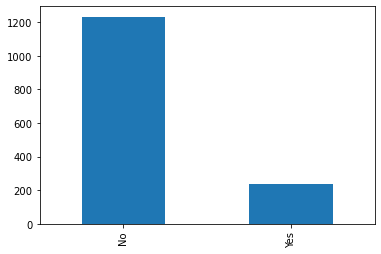

In [16]:
df.Attrition.value_counts().plot(kind = 'bar')
print(df.Attrition.value_counts())

It is an Unbalanced Dataset. We have very less instances of Attrition

Text(0.5, 0, 'Age')

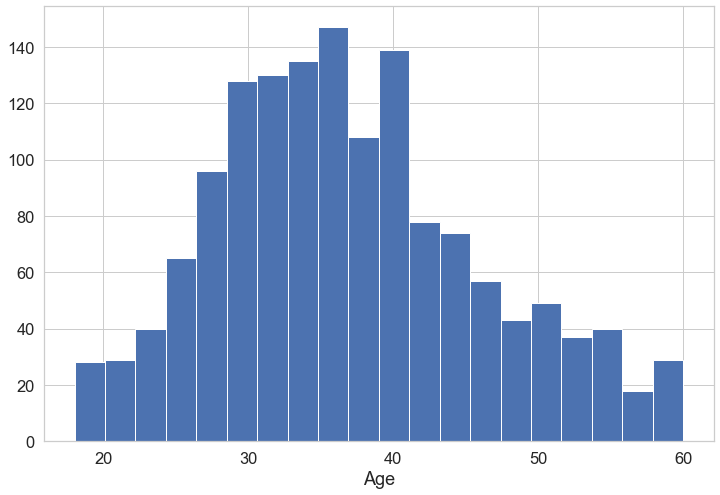

In [26]:
# Age Distribution and Range
sns.set(font_scale=1.5) 
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
df['Age'].hist(bins=20)
plt.xlabel('Age')

Most of the employees are in between age 28 - 42

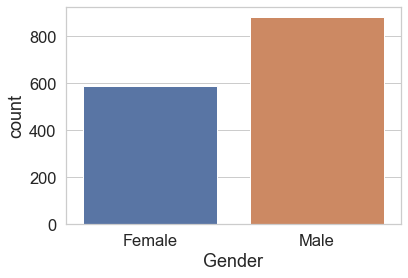

In [27]:
#Male and Female Distribution in the Dataset
sns.countplot(x='Gender', data=df)
plt.xlabel("Gender")
plt.show()

Text(0, 0.5, 'Count')

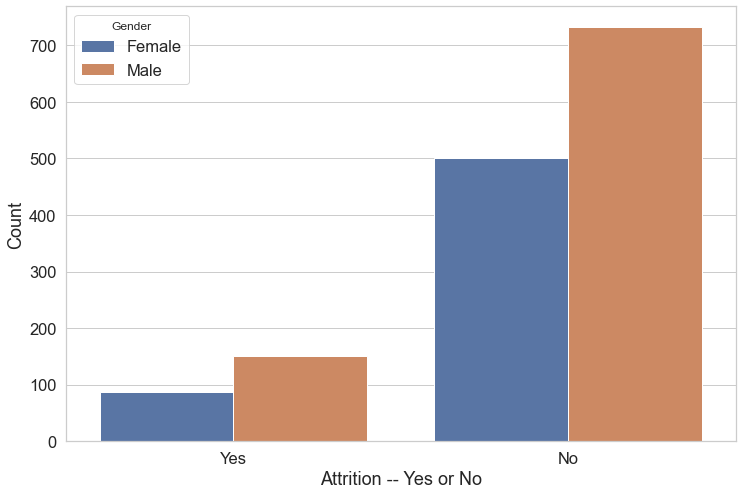

In [28]:
# Gender-wise Attrition
plt.figure(figsize=(12,8))
sns.countplot(x='Attrition',hue='Gender',data=df)
plt.xlabel("Attrition -- Yes or No")
plt.ylabel("Count")

Here, at first glance we can see that attrition is more in Males than Females. But we have to be careful before giving this statement because Males are more in Numbers than Females and we can conclude only after comparing in ratios

In [44]:
#Converting Attrition = (Yes and No) into 2 numerical columns
Employees_left = []
for i in df.Attrition:
    if i == 'Yes':
        k = 1
    else:
        k = 0
    Employees_left.append(k)
df['Attrition_Yes'] = Employees_left
df['Attrition_No'] = 1 - df['Attrition_Yes']        

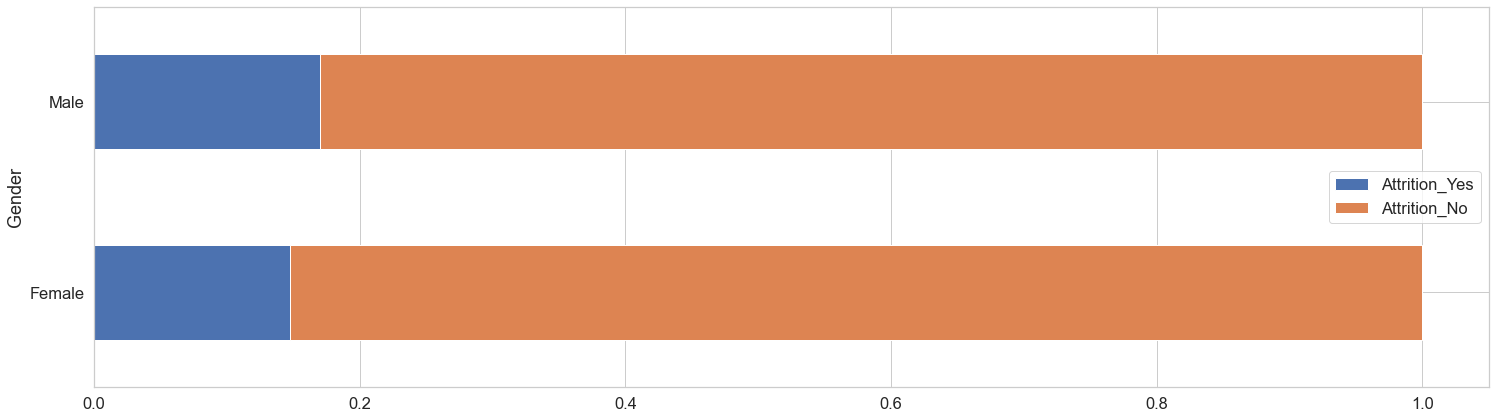

In [48]:
df.groupby('Gender').agg('mean')[['Attrition_Yes', 'Attrition_No']].plot(kind='barh', figsize=(25, 7), stacked=True)

When compared with ratio we can clearly see that the Attrition Rate is more in Males. Females are more likely to stay in the Organization

Text(0, 0.5, 'Count')

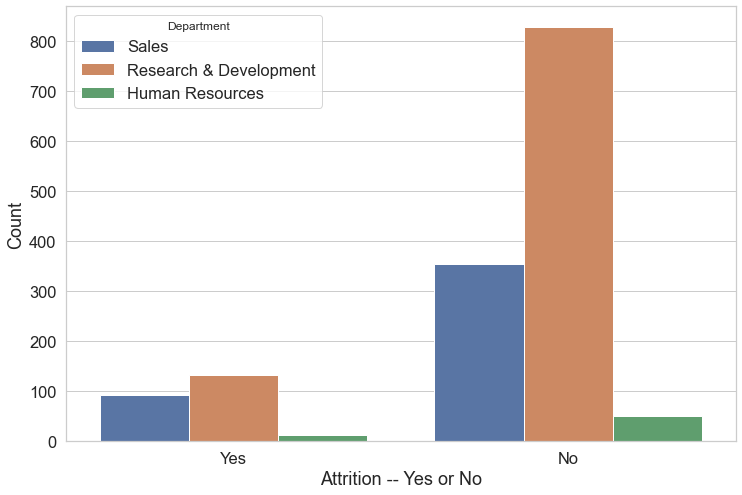

In [29]:
# Department-wise Attrition
plt.figure(figsize=(12,8))
sns.countplot(x='Attrition',hue='Department',data=df)
plt.xlabel("Attrition -- Yes or No")
plt.ylabel("Count")

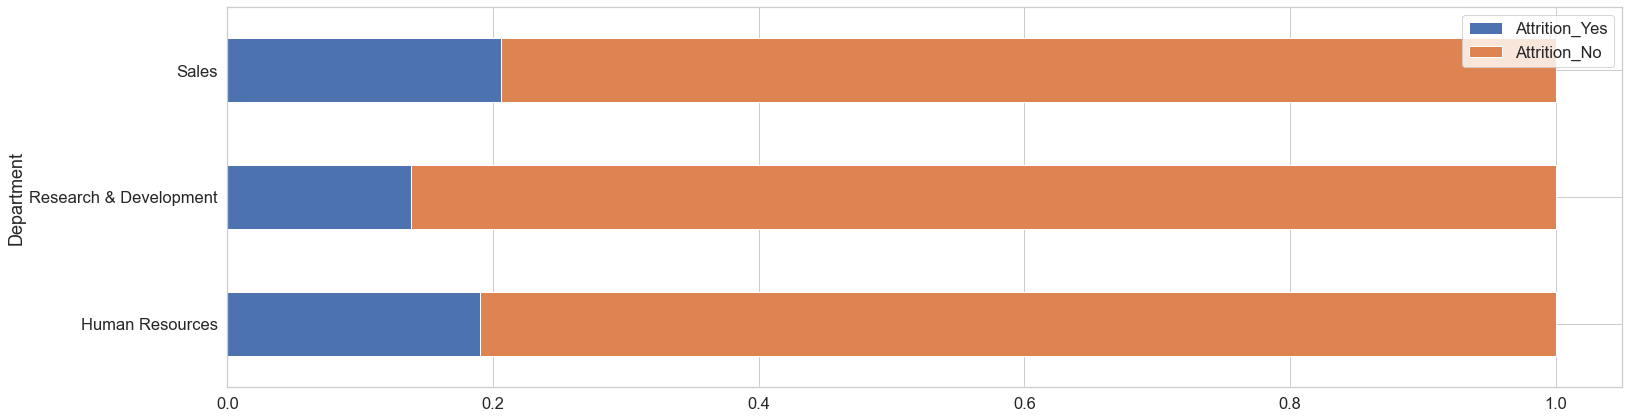

In [47]:
df.groupby('Department').agg('mean')[['Attrition_Yes', 'Attrition_No']].plot(kind='barh', figsize=(25, 7), stacked=True)

The Department with highest attrition is Sales Department 

Text(0, 0.5, 'Count')

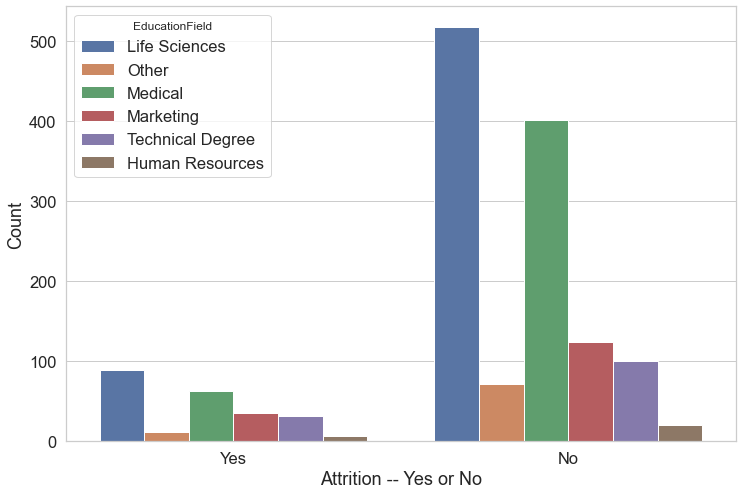

In [204]:
plt.figure(figsize=(12,8))
sns.countplot(x='Attrition',hue='EducationField',data=df)
plt.xlabel("Attrition -- Yes or No")
plt.ylabel("Count")

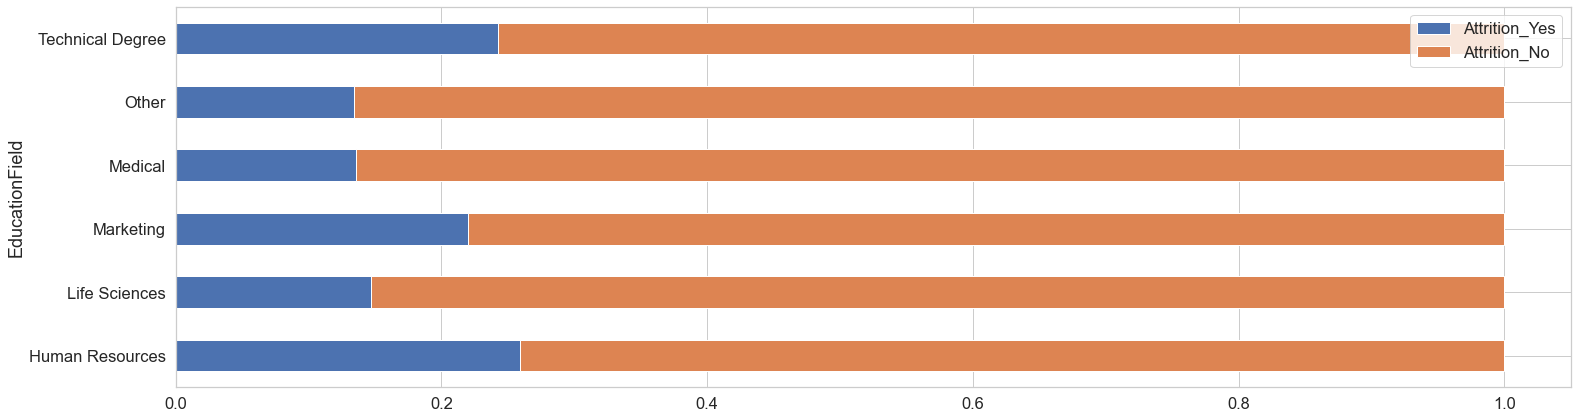

In [49]:
df.groupby('EducationField').agg('mean')[['Attrition_Yes', 'Attrition_No']].plot(kind='barh', figsize=(25, 7), stacked=True)

Employees from Human Resources, Technical degree and Marketing has highest attrition

In [54]:
df.columns[df.dtypes == object]

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

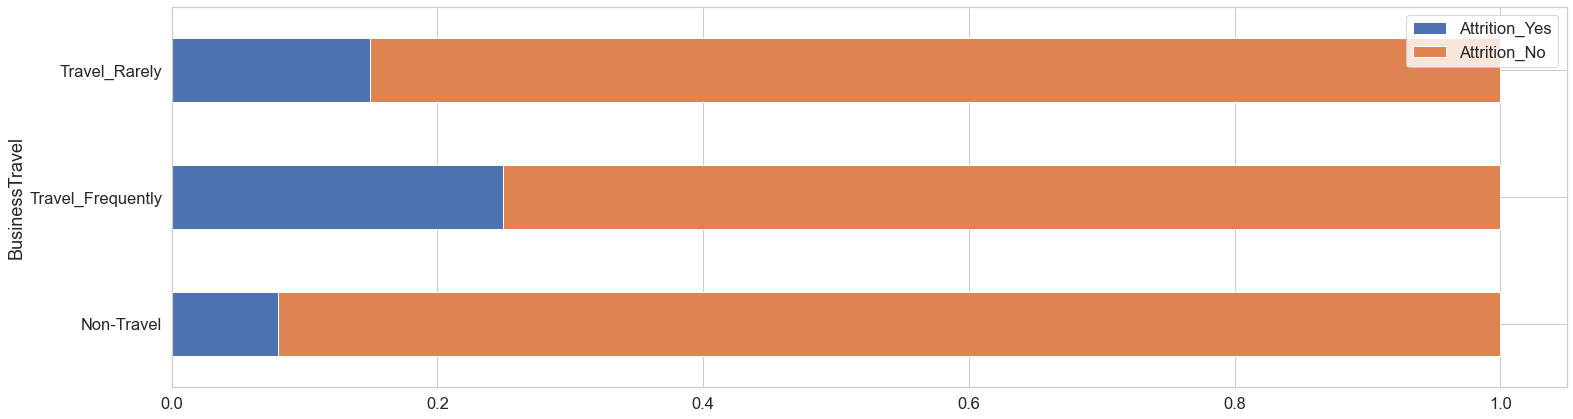

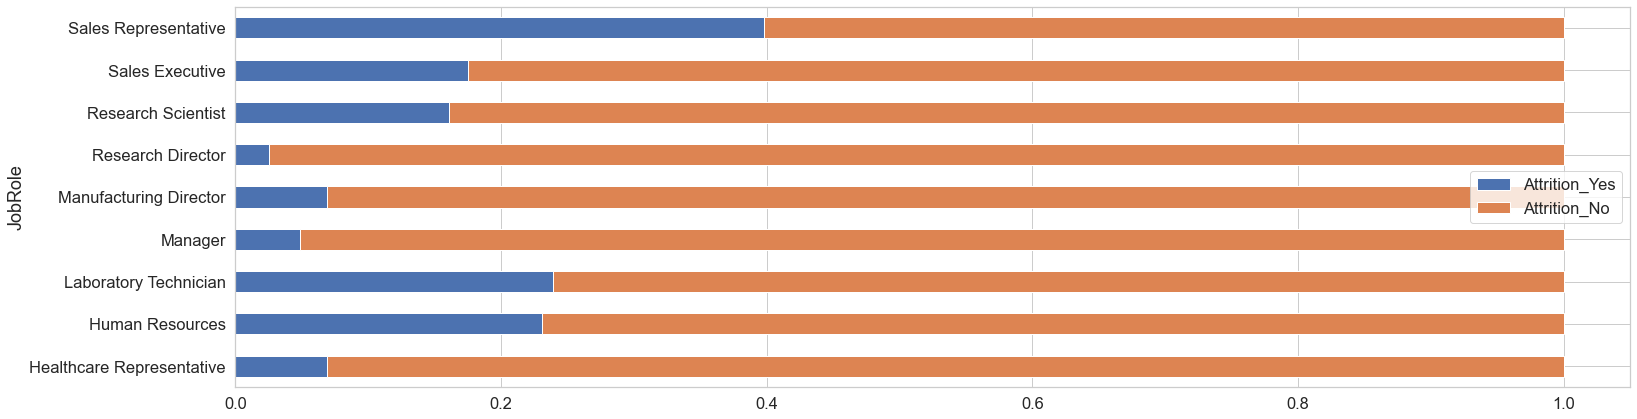

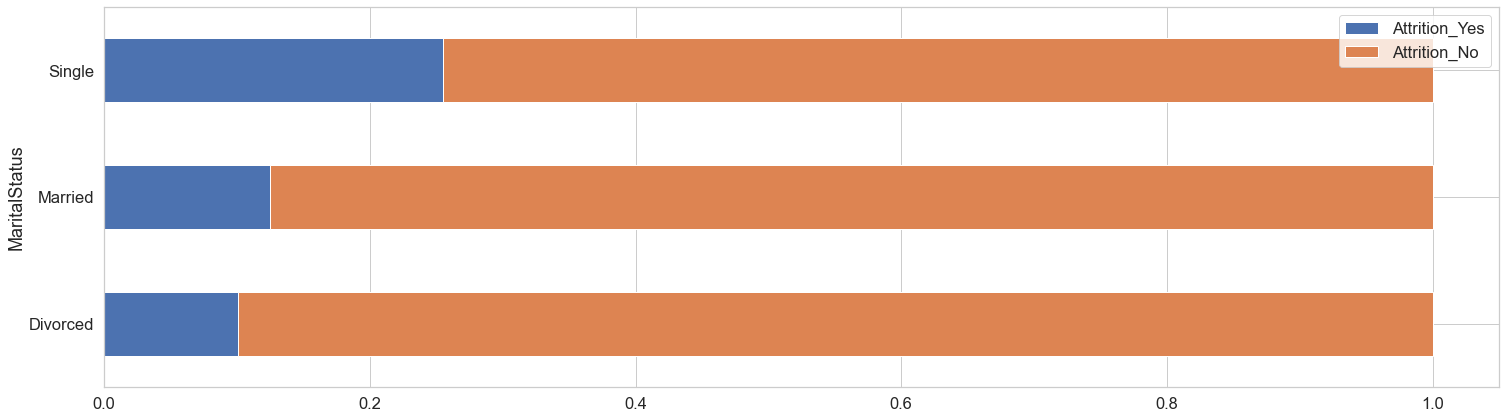

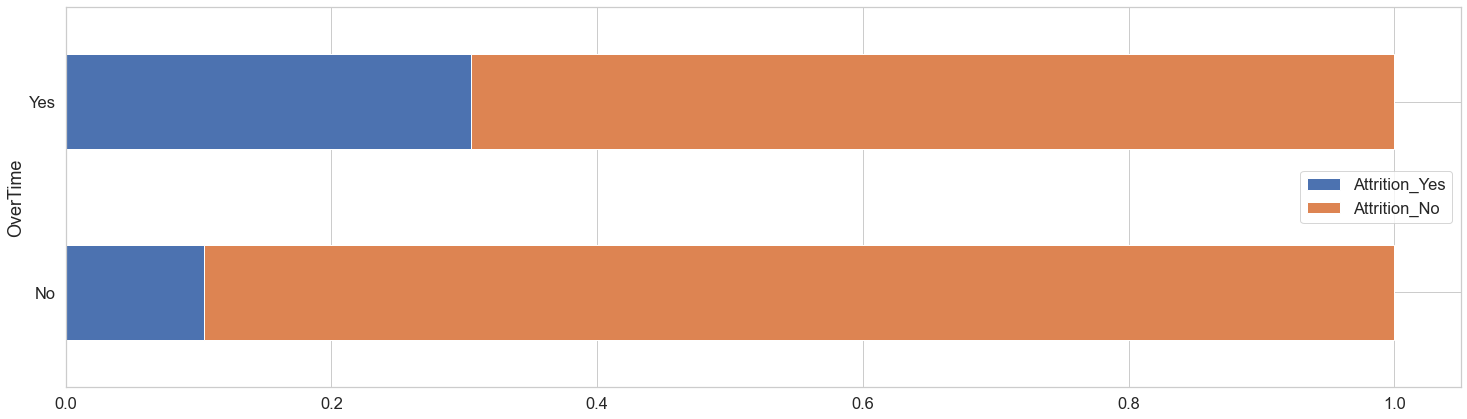

In [63]:
for i in ['BusinessTravel', 'JobRole', 'MaritalStatus', 'OverTime']:
    df.groupby(i).agg('mean')[['Attrition_Yes', 'Attrition_No']].plot(kind='barh', figsize=(25, 7), stacked=True)

Observations:
    1. People who travel frequently has more chances of Attrition.
    2. Sales Representatiove has high Attrition rate.
    3. Single people have more attrition.
    4. People who work overtime have more attrition

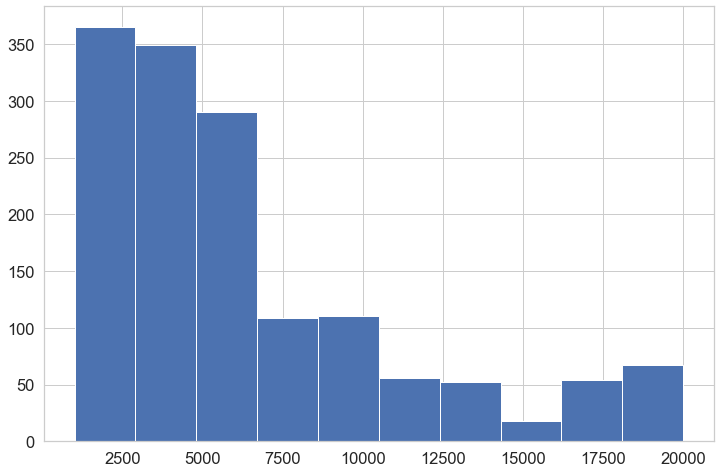

In [66]:
# Monthly Income Plot
plt.figure(figsize=(12,8))
df['MonthlyIncome'].hist()

Most of the Employees have Income less than 7500

In [68]:
# Dividing into 3 categories of Income
Income_Level = []
for i in df['MonthlyIncome']:
    if i < 7500:
        status = 'Low Income'
    elif i > 15000:
        status = 'High Income'
    else:
        status = 'Medium Income'
    Income_Level.append(status)
df['Income_Level'] = Income_Level

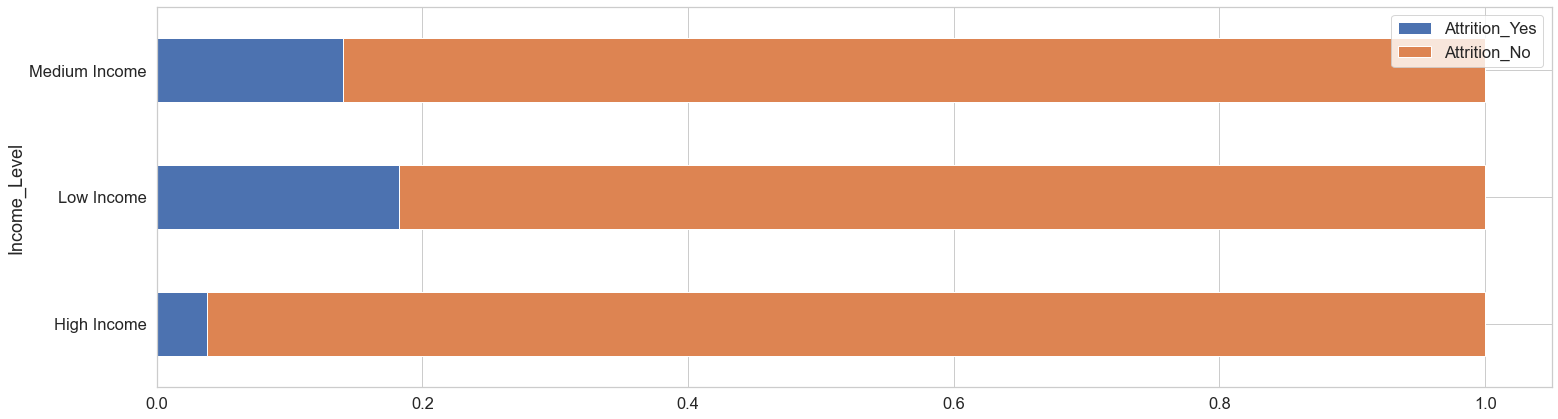

In [70]:
df.groupby('Income_Level').agg('mean')[['Attrition_Yes', 'Attrition_No']].plot(kind='barh', figsize=(25, 7), stacked=True)

People with Low Income have High attrition

In [62]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_Yes', 'Attrition_No'],
      dtype='object')

## Model Building  

###### Preprocessing

In [71]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Attrition_No,Income_Level
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,1,0,Low Income
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,1,Low Income
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,1,0,Low Income
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,1,Low Income
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,0,1,Low Income


In [79]:
df.columns[df.dtypes == object]

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Income_Level'],
      dtype='object')

#### Dealing with Unbalanced Dataset 

In [133]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [134]:
df.Attrition_Yes.value_counts()

0    1233
1     237
Name: Attrition_Yes, dtype: int64

In [136]:
1233/237    

5.2025316455696204

In [155]:
df_ml = df.copy()

In [156]:
from sklearn.utils import shuffle
A= df_ml[df_ml['Attrition_Yes']==1]
B= df_ml[df_ml['Attrition_Yes']==0]
A_repeated = pd.concat([A]*5, ignore_index=True)
df_ml = pd.concat([A_repeated,B])
df_ml = shuffle(df_ml)
df_ml = df_ml.reset_index(drop=True)

In [158]:
df_ml.Attrition_Yes.value_counts()

0    1233
1    1185
Name: Attrition_Yes, dtype: int64

In [159]:
df_ml.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_Yes', 'Attrition_No',
       'Income_Level'],
      dtype='object')

In [160]:
y = df_ml['Attrition_Yes'].values   # Target Variable

In [161]:
# Dropping Unwanted Columns
df_ml = df_ml.drop(['Attrition_Yes', 'Attrition_No','Income_Level'], axis = 1)

In [162]:
df.Over18.unique() # It has only one variable hence redundant

array(['Y'], dtype=object)

In [163]:
df_ml = df_ml.drop(['Over18','Attrition'], axis = 1)

In [164]:
list(df_ml.columns[df_ml.dtypes == object])

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [165]:
# Converting categorical data into numbers
lbl=LabelEncoder()
df_ml['BusinessTravel'] = lbl.fit_transform(df_ml['BusinessTravel'])
df_ml['Department'] = lbl.fit_transform(df_ml['Department'])
df_ml['EducationField'] = lbl.fit_transform(df_ml['EducationField'])
df_ml['Gender'] = lbl.fit_transform(df_ml['Gender'])
df_ml['JobRole'] = lbl.fit_transform(df_ml['JobRole'])
df_ml['MaritalStatus'] = lbl.fit_transform(df_ml['MaritalStatus'])
df_ml['OverTime'] = lbl.fit_transform(df_ml['OverTime'])

In [166]:
df_ml.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,26,2,1146,2,8,3,5,1,796,4,...,3,80,0,6,2,2,4,3,1,2
1,24,2,693,2,3,2,1,1,720,1,...,1,80,0,4,3,3,2,2,2,0
2,50,2,410,2,28,3,2,1,2055,4,...,2,80,1,20,3,3,3,2,2,0
3,42,2,1128,1,13,3,3,1,1803,2,...,3,80,2,10,2,2,0,0,0,0
4,41,0,267,2,10,2,1,1,599,4,...,4,80,0,16,3,3,14,3,1,10


In [167]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2418 non-null   int64
 1   BusinessTravel            2418 non-null   int32
 2   DailyRate                 2418 non-null   int64
 3   Department                2418 non-null   int32
 4   DistanceFromHome          2418 non-null   int64
 5   Education                 2418 non-null   int64
 6   EducationField            2418 non-null   int32
 7   EmployeeCount             2418 non-null   int64
 8   EmployeeNumber            2418 non-null   int64
 9   EnvironmentSatisfaction   2418 non-null   int64
 10  Gender                    2418 non-null   int32
 11  HourlyRate                2418 non-null   int64
 12  JobInvolvement            2418 non-null   int64
 13  JobLevel                  2418 non-null   int64
 14  JobRole                   2418 non-null 

In [168]:
X = df_ml.values   #  Independent Variables

In [169]:
#Importing Minmax Scaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_minmax = scaler.fit_transform(X)

In [170]:
# Splitting into training and Test dataset
X_train,X_test,y_train,y_test=train_test_split(X_minmax,y,test_size=0.2,random_state=100)

In [196]:
# Importing Classification Models
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [197]:
model_list = [KMeans(),LogisticRegression(),SVC(),RandomForestClassifier()]

In [198]:
for model in model_list:
        model.fit(X_train,y_train)
        pred=model.predict(X_test)
        print('Model Name :', model)
        print("accuracy_score: ",accuracy_score(y_test,pred))
        #print(confusion_matrix(y_test,pred))
        #print(classification_report(y_test,pred))
        print('\n')

Model Name : KMeans()
accuracy_score:  0.11363636363636363


Model Name : LogisticRegression()
accuracy_score:  0.7252066115702479


Model Name : SVC()
accuracy_score:  0.8450413223140496


Model Name : RandomForestClassifier()
accuracy_score:  0.981404958677686




In [200]:
randfor = RandomForestClassifier()
randfor.fit(X_train,y_train)
predictions = randfor.predict(X_test)

In [201]:
print("accuracy_score: ",accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))

accuracy_score:  0.9793388429752066
[[243  10]
 [  0 231]]


In [202]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       253
           1       0.96      1.00      0.98       231

    accuracy                           0.98       484
   macro avg       0.98      0.98      0.98       484
weighted avg       0.98      0.98      0.98       484



In [203]:
#Saving the Best Model
import joblib
# Saving the model as a pickle in a file
joblib.dump(randfor,"HR_attrition_classification.pkl")

['HR_attrition_classification.pkl']